Scratch:

Read in Communities data (summary spreadsheet from GRID3 SEs w/UN PP data):
EG: AFPW-GHA-Communities-Ahafo.1000-20000.summary.xlsx

Read in WQAL lab locations data (filter down to only regional labs)

F.E. community, get distance to all lab locations
Find min distance to any lab; save distance (KM) and nearest lab 

Add to community summary data sheet and re-export

Get filter numbers: num within 60k, 120k, 180k, 240k, >


**NB**: Eventually, add this to the AFPW Ghana Communities data processing sheet - to create all that data in one place

In [39]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
from tqdm.notebook import tqdm
from geopy.distance import distance

In [3]:
comms_file = "/Users/datascience/Development/aquaya/py-sandbox/assurance-fund/export/AFPW-AnnotatedCommunities.1000-200000.summary.xlsx"
pp_file = "/Users/datascience/Development/aquaya/py-sandbox/assurance-fund/export/AFPW-PopulatedPlaces.1000-200000.populatedplaces.xlsx"
labs_file = "/Users/datascience/Development/aquaya/py-sandbox/assurance-fund/data/GWCL Regional Labs.xlsx"

In [4]:
labs_df = pd.read_excel(labs_file)
labs_df = labs_df.dropna(subset=["Latitude", "Longitude"])
labs_df.shape

(9, 9)

In [6]:
labs_df

,Name,Type,Region,District,Community,Latitude,Longitude,StreetAddress,Comments
1,Ashanti Regional Laboratory,regional,Ashanti,Kumasi Metropolitan Assembly,Kumasi,6.583405,-1.619360,"Dadiesoaba street, Kumasi, Ghana",BY 2024
2,Western Regional Laboratory,regional,Western,Sekondi - Takoradi Metropolitan Assembly,Takoradi,4.906113,-1.767554,NaN,Location assigned from approximate center of T...
3,Central Regional Laboratory,regional,Central,Cape Coast Metropolitan,Cape Coast,5.124964,-1.269743,NaN,Location assigned from approximate center of C...
4,Eastern Regional Laboratories,regional,Eastern,New Juaben Municipal,Koforidua,6.108099,-0.283530,Nankese- Koforidua Rd,BY 2024-06
5,Northern Regional Laboratory,regional,Northern,Tamale Metropolitan,Tamale,9.417267,-0.849710,"C48X+RWC, Education Ridge Rd, Tamale, Ghana",Location and address via Google Maps search (m...
6,Volta Regional Laboratory,regional,Volta,Ho Municipal,Ho,6.610102,-0.460243,Woezor Hotel road,BY 2024-06
7,Brong Ahafo Regional Laboratory,regional,Bono,Sunyani Municipal,Sunyani,7.332161,-2.330540,"Anglican, Sunyani , Ghana",BY 2024-06
8,Upper East Regional Laboratory,regional,Upper East,Bolgatanga Municipal,Bolgatanga,10.793384,-0.856519,NaN,Location assigned from approximate center of B...
9,Upper West Regional Laboratory,regional,Upper West,Wa Municipal,Wa,10.059880,-2.511347,NaN,Location assigned from approximate center of W...


In [7]:
comms_df = pd.read_excel(comms_file)
comms_df.shape

(1039, 19)

In [8]:
pp_df = pd.read_excel(pp_file)
pp_df.shape

(1416, 16)

In [11]:
comms_df.head(1)

,OBJECTID,country,iso,type,population,pop_un_adj,adm0_pcode,adm1_name,adm1_pcode,adm2_name,adm2_pcode,settl_pcode,Shape__Area,Shape__Length,approx_center_lat,approx_center_lon,Communities,NumCommunities,CommunityName
0,47262,Ghana,GHA,Small Settlement Area,1741.494917,1637.835636,GH,Ashanti,GH02,Adansi Akrofuom,GH0201,GH0201000022,0.000045,0.031784,6.055197,-1.733869,"[{'community': 'Amponyase', 'source': 'HOT-OSM...",1,Amponyase


In [12]:
pp_df.head(1)

,country,adm1_name,adm1_pcode,adm2_name,adm2_pcode,community,latitude,longitude,settlement_type,pop_un_adj,mgrs_code,settl_pcode,assignment_method,source,source_id,source_id_field
0,Ghana,Ashanti,GH02,Adansi Akrofuom,GH0201,Amponyase,6.054044,-1.732255,Small Settlement Area,1637.835636,30NXM4069_02,GH0201000022,contains,HOT-OSM,2160830377,osm_id


## Compute Nearest Labs - Settled Areas

In [15]:
for c in tqdm(comms_df.itertuples()):
    min_dist_lab = None
    min_dist = 9999.0
    for l in labs_df.itertuples():
        d = distance((c.approx_center_lat, c.approx_center_lon), (l.Latitude, l.Longitude))
        #print(f"{c.UN_CommunityName} {c.approx_center_lat}, {c.approx_center_lon}\t{l.Name}\t{d}")
        if d < min_dist:
            min_dist = d
            min_dist_lab = l
    if min_dist_lab is None:
        print(f"No min dist for <{c}>!")
    else:
        comms_df.at[c.Index, "NearestRegionalLab"] = min_dist_lab.Name
        comms_df.at[c.Index, "NearestRegionalLab_DistanceKM"] = min_dist.km

0it [00:00, ?it/s]

In [16]:
comms_df.head(2)

,OBJECTID,country,iso,type,population,pop_un_adj,adm0_pcode,adm1_name,adm1_pcode,adm2_name,...,settl_pcode,Shape__Area,Shape__Length,approx_center_lat,approx_center_lon,Communities,NumCommunities,CommunityName,NearestRegionalLab,NearestRegionalLab_DistanceKM
0,47262,Ghana,GHA,Small Settlement Area,1741.494917,1637.835636,GH,Ashanti,GH02,Adansi Akrofuom,...,GH0201000022,0.000045,0.031784,6.055197,-1.733869,"[{'community': 'Amponyase', 'source': 'HOT-OSM...",1,Amponyase,Ashanti Regional Laboratory,59.771657
1,47264,Ghana,GHA,Small Settlement Area,1139.194799,1071.386330,GH,Ashanti,GH02,Adansi Akrofuom,...,GH0201000024,0.000030,0.026961,6.060373,-1.616806,"[{'community': 'Mensonso No.1', 'source': 'HOT...",1,Mensonso No.1,Ashanti Regional Laboratory,57.841675


## Compute Nearest Labs - Populated Places (Actual Communities)

In [17]:
for c in tqdm(pp_df.itertuples()):
    min_dist_lab = None
    min_dist = 9999.0
    for l in labs_df.itertuples():
        d = distance((c.latitude, c.longitude), (l.Latitude, l.Longitude))
        #print(f"{c.UN_CommunityName} {c.approx_center_lat}, {c.approx_center_lon}\t{l.Name}\t{d}")
        if d < min_dist:
            min_dist = d
            min_dist_lab = l
    if min_dist_lab is None:
        print(f"No min dist for <{c}>!")
    else:
        pp_df.at[c.Index, "NearestRegionalLab"] = min_dist_lab.Name
        pp_df.at[c.Index, "NearestRegionalLab_DistanceKM"] = min_dist.km

0it [00:00, ?it/s]

In [18]:
pp_df.head(2)

,country,adm1_name,adm1_pcode,adm2_name,adm2_pcode,community,latitude,longitude,settlement_type,pop_un_adj,mgrs_code,settl_pcode,assignment_method,source,source_id,source_id_field,NearestRegionalLab,NearestRegionalLab_DistanceKM
0,Ghana,Ashanti,GH02,Adansi Akrofuom,GH0201,Amponyase,6.054044,-1.732255,Small Settlement Area,1637.835636,30NXM4069_02,GH0201000022,contains,HOT-OSM,2160830377,osm_id,Ashanti Regional Laboratory,59.858685
1,Ghana,Ashanti,GH02,Adansi Akrofuom,GH0201,Mensonso No.1,6.041287,-1.589705,Small Settlement Area,1071.386330,30NXM5370_02,GH0201000024,nearest,HOT-OSM,11486141258,osm_id,Ashanti Regional Laboratory,60.041359


## Explore

In [22]:
comms_df["NearestRegionalLab"].value_counts()

NearestRegionalLab
Ashanti Regional Laboratory        322
Eastern Regional Laboratories      274
Volta Regional Laboratory          260
Brong Ahafo Regional Laboratory    177
Central Regional Laboratory          6
Name: count, dtype: int64

In [23]:
pp_df["NearestRegionalLab"].value_counts()

NearestRegionalLab
Eastern Regional Laboratories      438
Ashanti Regional Laboratory        436
Volta Regional Laboratory          323
Brong Ahafo Regional Laboratory    213
Central Regional Laboratory          6
Name: count, dtype: int64

<Axes: >

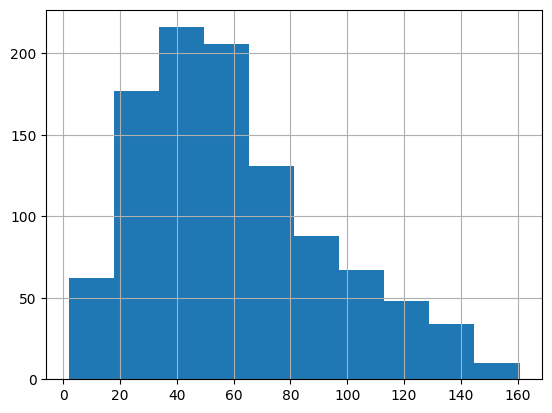

In [24]:
comms_df["NearestRegionalLab_DistanceKM"].hist()

<Axes: xlabel='NearestRegionalLab_DistanceKM', ylabel='Percent'>

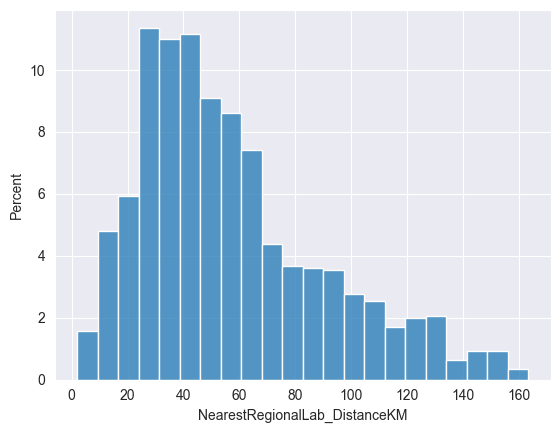

In [57]:
sns.set_style("darkgrid")
sns.histplot(data=pp_df, x="NearestRegionalLab_DistanceKM", stat="percent")

## Distance Stats

In [26]:
limits = [30, 60, 120, 180, 999999]

In [28]:
for reg, reg_df in comms_df.groupby("adm1_name"):
    
    print(f"{reg}")
    total = reg_df.shape[0]
    for dl in limits:
        num_within = (reg_df["NearestRegionalLab_DistanceKM"] < dl).sum()
        print(f"< {dl}km: {num_within} / {total} ({100*num_within/total:0.2f}%)")

Ahafo
< 30km: 9 / 41 (21.95%)
< 60km: 26 / 41 (63.41%)
< 120km: 41 / 41 (100.00%)
< 180km: 41 / 41 (100.00%)
< 999999km: 41 / 41 (100.00%)
Ashanti
< 30km: 87 / 322 (27.02%)
< 60km: 279 / 322 (86.65%)
< 120km: 322 / 322 (100.00%)
< 180km: 322 / 322 (100.00%)
< 999999km: 322 / 322 (100.00%)
Bono
< 30km: 9 / 119 (7.56%)
< 60km: 60 / 119 (50.42%)
< 120km: 119 / 119 (100.00%)
< 180km: 119 / 119 (100.00%)
< 999999km: 119 / 119 (100.00%)
Eastern
< 30km: 91 / 332 (27.41%)
< 60km: 232 / 332 (69.88%)
< 120km: 332 / 332 (100.00%)
< 180km: 332 / 332 (100.00%)
< 999999km: 332 / 332 (100.00%)
Volta
< 30km: 0 / 225 (0.00%)
< 60km: 2 / 225 (0.89%)
< 120km: 157 / 225 (69.78%)
< 180km: 225 / 225 (100.00%)
< 999999km: 225 / 225 (100.00%)


In [29]:
for reg, reg_df in pp_df.groupby("adm1_name"):
    
    print(f"{reg}")
    total = reg_df.shape[0]
    for dl in limits:
        num_within = (reg_df["NearestRegionalLab_DistanceKM"] < dl).sum()
        print(f"< {dl}km: {num_within} / {total} ({100*num_within/total:0.2f}%)")

Ahafo
< 30km: 11 / 45 (24.44%)
< 60km: 29 / 45 (64.44%)
< 120km: 45 / 45 (100.00%)
< 180km: 45 / 45 (100.00%)
< 999999km: 45 / 45 (100.00%)
Ashanti
< 30km: 116 / 432 (26.85%)
< 60km: 379 / 432 (87.73%)
< 120km: 432 / 432 (100.00%)
< 180km: 432 / 432 (100.00%)
< 999999km: 432 / 432 (100.00%)
Bono
< 30km: 19 / 148 (12.84%)
< 60km: 81 / 148 (54.73%)
< 120km: 148 / 148 (100.00%)
< 180km: 148 / 148 (100.00%)
< 999999km: 148 / 148 (100.00%)
Eastern
< 30km: 160 / 512 (31.25%)
< 60km: 393 / 512 (76.76%)
< 120km: 512 / 512 (100.00%)
< 180km: 512 / 512 (100.00%)
< 999999km: 512 / 512 (100.00%)
Volta
< 30km: 0 / 279 (0.00%)
< 60km: 2 / 279 (0.72%)
< 120km: 187 / 279 (67.03%)
< 180km: 279 / 279 (100.00%)
< 999999km: 279 / 279 (100.00%)


In [30]:
pp_df.shape

(1416, 18)

## Test Mapbox distances (driving / road travel)

EG:
```python
resp = Directions('mapbox.driving').directions([origin, destination])
driving_routes = resp.geojson()
first_route = driving_routes['features'][0]
```

In [52]:
import json
import mapbox

In [35]:
# The (lon, lat) GEOJSON point features
gambia2_ft = (-2.656115, 7.0623)
ba_lab_ft = (-2.33054, 7.332161)

In [43]:
directions_con = mapbox.Directions(access_token="pk.eyJ1IjoiZHVuY2FuLWFxdWF5YSIsImEiOiJjbHhiem5oMHMwaDZ2MmtzMzE3MDRtbG10In0.Z3c0_caJZMXjbR0bYw-w2w")
directions_con

In [46]:
resp = directions_con.directions(features=[gambia2_ft, ba_lab_ft], profile="mapbox.driving")
resp

/Users/datascience/Development/aquaya/py-sandbox/venv/lib/python3.9/site-packages/mapbox/services/directions.py:41: MapboxDeprecationWarning: Converting v4 profile to v5, use mapbox/driving instead
  warnings.warn('Converting v4 profile to v5, use {} instead'.format(profile),


<Response [200]>

In [48]:
resp_data = resp.geojson()

In [62]:
# Distance: meters; Duration: seconds
resp_data["features"][0]["properties"]

{'distance': 97302.219, 'duration': 9363.027}

In [54]:
json.dumps(resp_data)

'{"type": "FeatureCollection", "features": [{"type": "Feature", "geometry": {"type": "LineString", "coordinates": [[-2.65611, 7.06206], [-2.65594, 7.06207], [-2.6554, 7.06249], [-2.65521, 7.06305], [-2.68197, 7.08522], [-2.69859, 7.09372], [-2.71456, 7.09678], [-2.74574, 7.14701], [-2.75765, 7.16015], [-2.76926, 7.16598], [-2.77134, 7.17588], [-2.78348, 7.20096], [-2.78614, 7.22631], [-2.78168, 7.2365], [-2.77402, 7.23969], [-2.77008, 7.24645], [-2.76354, 7.25134], [-2.75879, 7.25825], [-2.75847, 7.26307], [-2.74032, 7.26149], [-2.73085, 7.26518], [-2.71755, 7.2648], [-2.70839, 7.28729], [-2.70065, 7.29468], [-2.69908, 7.30788], [-2.70606, 7.32125], [-2.70558, 7.32547], [-2.67011, 7.35486], [-2.66108, 7.3692], [-2.65802, 7.37869], [-2.65832, 7.39083], [-2.6548, 7.3971], [-2.63069, 7.42317], [-2.60922, 7.43827], [-2.59556, 7.44185], [-2.58409, 7.45042], [-2.57212, 7.43806], [-2.56385, 7.4337], [-2.54821, 7.43808], [-2.51377, 7.43648], [-2.47546, 7.41006], [-2.4691, 7.40337], [-2.44415, 

In [55]:
resp_data


{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'LineString',
    'coordinates': [(-2.65611, 7.06206),
     (-2.65594, 7.06207),
     (-2.6554, 7.06249),
     (-2.65521, 7.06305),
     (-2.68197, 7.08522),
     (-2.69859, 7.09372),
     (-2.71456, 7.09678),
     (-2.74574, 7.14701),
     (-2.75765, 7.16015),
     (-2.76926, 7.16598),
     (-2.77134, 7.17588),
     (-2.78348, 7.20096),
     (-2.78614, 7.22631),
     (-2.78168, 7.2365),
     (-2.77402, 7.23969),
     (-2.77008, 7.24645),
     (-2.76354, 7.25134),
     (-2.75879, 7.25825),
     (-2.75847, 7.26307),
     (-2.74032, 7.26149),
     (-2.73085, 7.26518),
     (-2.71755, 7.2648),
     (-2.70839, 7.28729),
     (-2.70065, 7.29468),
     (-2.69908, 7.30788),
     (-2.70606, 7.32125),
     (-2.70558, 7.32547),
     (-2.67011, 7.35486),
     (-2.66108, 7.3692),
     (-2.65802, 7.37869),
     (-2.65832, 7.39083),
     (-2.6548, 7.3971),
     (-2.63069, 7.42317),
     (-2.60922, 7.43827),
     